In [1]:
import numpy as np
import pandas as pd

# Question 1 : 
+ processing data : Energy Indicators.xls , World_bank.csv , Scimagojr-3.xlsx

In [60]:
def ans_one():
    # step 1 : read Energy Indicators.xls 
    # is a list of indicators of energy supply and renewable eclectricity production from the united nations for year 2013
    
    x = pd.ExcelFile('Energy Indicators.xls')
    energy = x.parse(skiprows = 17 , skip_footer = (38))
    # the 2 first columns are unneccessary , we should rid get them (rid columns : Unnamed: 0 and Unnamed: 2)
    energy = energy[['Unnamed: 1', 'Petajoules', 'Gigajoules', '%']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # for all countries which have missing data (e.g data with "...") , make sure reflected as np.NaN value
    energy = energy[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace({"...": np.NaN})
    #energy = energy[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace("...",np.NaN).apply(np.to_numeric)
    
    # convert "Energy Supply" and "Energy Supply per Capita" to gigajoules (ther are 1000000 gigajoules in a petajoules)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    # rename the list countries special
    energy['Country'] = energy['Country'].replace({"Republic of Korea": "South Korea",
                                    "United States of America": "United States",
                                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                    "China, Hong Kong Special Administrative Region": "Hong Kong",
                                                  "Iran, Islamic Rep.":"Iran"})
    # remove the string in parenthesis and parenthesis of severral countries specical
    energy['Country'] = energy['Country'].str.replace(r"\(.*\)","")
    
    # step 2 : read : world_bank.csv
    # contain countries'GDP from the 1960 to 2015 from wold bank
    
    #consider data frame , 4 first rows unneccessary , we should rid get of them
    df_GDP = pd.read_csv('world_bank.csv', skiprows= 4)
    # rename for countries special
    df_GDP['Country Name'] = df_GDP['Country Name'].replace("Korea, Rep.","South Korea")
    df_GDP['Country Name'] = df_GDP['Country Name'].replace("Iran, Islamic Rep.","Iran" )
    df_GDP['Country Name'] = df_GDP['Country Name'].replace("Hong Kong SAR, China", "Hong Kong")
    # take columns
    df_GDP = df_GDP[['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    df_GDP.columns = ['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    # step 3 : read : scimigojr-3.xlsx : 
    # frame rank data the countries of enrgy engineering and power technology
    
    Scim = pd.read_excel(io = 'scimagojr-3.xlsx')
    # take the 15 first rank top countries
    ScimEn = Scim[:15]
    
    # merge energy , ScimEn : how = inner 
    df = pd.merge(ScimEn, energy, how = 'inner', left_on= 'Country', right_on= 'Country')
    # merge df, df_GDP , how = inner
    final_df = pd.merge(df, df_GDP, how = 'inner', left_on= 'Country', right_on = 'Country')
    return final_df
ans_one()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,2,United States,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
5,6,Canada,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
6,7,Germany,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
7,8,India,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
8,9,France,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
9,10,South Korea,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


# Question 2 :
+ What are the top 15 countries for average GDP over the last 10 years?
+ 15 quốc gia có GDP trung bình  trong 10 năm là j 

In [61]:
def ans_two():
    df_top15 = ans_one()
    df_top15['avgGDP'] = df_top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis = 1)
    ans = df_top15[['Country','avgGDP']].set_index('Country')
    # sort deascending of average GDP
    return ans['avgGDP'].sort_values(ascending = False) 
ans_two()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Name: avgGDP, dtype: float64

In [62]:
# the way 2
def answer_two1():
    # take 15 countries top
    top15 = ans_one().set_index('Country')
    # tinh GDP trung binh 10 cua tung quoc gia 
    gdp = top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis =1).rename('agvGDP')
    # sap xep cac nuoc co GDP theo thu tu giam dan
    a = gdp.sort_values(ascending = False)
    return a
answer_two1()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Name: agvGDP, dtype: float64

# Question 3: 
+ By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

+ sự thay đổi GDP trong 10 năm của quốc giá có GDP trung bình đứng thứ 6 như tn

+ This function should return a single number.

In [63]:
# test 
df_top15 = ans_one()
# copute avarage GDP of 15 top countries 
df_top15['avgGDP'] = df_top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis = 1)
# take avgGDP , Country
ans = df_top15[['Country','avgGDP']].set_index('Country')
# sort deascending of average GDP
a = ans['avgGDP'].sort_values(ascending = False)
# index 0->14 : location of country have average GDP 6th
a6 = a[5]
a6

2487906661418.4175

In [64]:
# find the row contain country having average GDP 6th
an_ = df_top15[df_top15['avgGDP'] == a6]
an_

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12


In [65]:
an_chang = int(an_['2015'] - an_['2006'])
an_chang

246702696075

# Question 4 
+ what the mean Energy Supply per capita ?
+ this function should return a single number

In [66]:
def ans_four():
    df_top15 = ans_one()
    mean = df_top15['Energy Supply per Capita'].mean()
    return mean
ans_four()

160.35714285714286

# Question 5 :
+ what country has maximum % Renewable and what is the percentage ?

+ This function should return a tuple with the name of the country and the percentage.

In [67]:
df_top15 = df_top15.set_index('Country')
df_top15.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13


In [68]:
# the way 1 : 
# take index of element % Renewable max
a = np.where(df_top15['% Renewable'] == np.max(df_top15['% Renewable']))
print(a)
ids = int(a[0])
ans = df_top15.iloc[ids,:].to_frame().T
list(ans['% Renewable'])

(array([13], dtype=int64),)


[69.64803]

In [69]:
# the way 2 :
a = np.max(df_top15['% Renewable'])
# take row corresponding
an_ = df_top15[df_top15['% Renewable'] == a]
list(an_['% Renewable'])

[69.64803]

In [70]:
an_.index.tolist()[0]

'Brazil'

In [71]:
def ans_five():
    a = np.max(df_top15['% Renewable'])
    ans = df_top15[df_top15['% Renewable'] == a]
    return (ans.index.tolist(),ans['% Renewable'].tolist())
ans_five()

(['Brazil'], [69.64803])

# Question 6 
+ Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

+ This function should return a tuple with the name of the country and the ratio

In [72]:
def ans_six():
    df_top15['ratio_Citation'] = df_top15['Self-citations']/df_top15['Citations']
    a = np.max(df_top15['ratio_Citation'])
    ans = df_top15[df_top15['ratio_Citation'] == a]
    return (ans.index.tolist(),ans['ratio_Citation'].tolist())
ans_six()

(['China'], [0.6893126179389422])

In [73]:
def ans_six():
    df_top15['ratio_Citation'] = df_top15['Self-citations']/df_top15['Citations']
    a = np.max(df_top15['ratio_Citation'])
    ans = df_top15[df_top15['ratio_Citation'] == a]
    return (ans.index.tolist()[0],ans['ratio_Citation'].tolist()[0])
ans_six()

('China', 0.6893126179389422)

# Queation 7 :
+ create a column that estimates (-ước lượng) the population using Energy Supply and Energy Supply per capita. What is the third most populous country according(-theo) to this estimate?
+ This function should return a single string value.

In [74]:
# compute estimate the population using Energy Supply and Energy Supply per Capita
df_top15['Estimate_Energy'] = (df_top15['Energy Supply']/df_top15['Energy Supply per Capita'])
df_top15.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,avgGDP,ratio_Citation,Estimate_Energy
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08


In [75]:
# sort deascending of column 'Estimate_Energy'
ans = df_top15['Estimate_Energy'].sort_values(ascending = False).to_frame()
ans

,Estimate_Energy
Country,
China,1.367645e+09
India,1.276731e+09
United States,3.176154e+08
Brazil,2.059153e+08
Russian Federation,1.435000e+08
Japan,1.274094e+08
Germany,8.036970e+07
United Kingdom,6.387097e+07
France,6.383735e+07


In [76]:
# take estimate of third most populous country
# location : 3 => index = 2 (index : 0-> n-1)
a = ans.iloc[2, :].to_frame().T
a

,Estimate_Energy
United States,3.176154e+08


In [77]:
a['Estimate_Energy'].tolist()[0]

317615384.61538464

In [78]:
a.index.tolist()[0]

'United States'

# Question 8
+ Create a column that estimates the number of citable documents per person. What is the correlation(- sự tương quan) between the number of citable documents per capita and the energy supply per capita?

+ This function should return a single number.

+ (Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita).

In [79]:
# step 1 : compute estimates the number of citable documents per person 
df_top15['Estimate_documents'] = df_top15['Citable documents']/df_top15['Citations per document']
df_top15.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,avgGDP,ratio_Citation,Estimate_Energy,Estimate_documents
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,26971.702128
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,11554.512195


In [80]:
# step 2 : compute correlation between :  the number of citable documents per person 'Estimate_documents'
# and the energy supply per capita : 'Estimate_Energy'
ans = df_top15['Estimate_documents'].corr(df_top15['Estimate_Energy'])
ans

0.6428238464954088

In [81]:
# visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita

In [82]:
import matplotlib as plt
%matplotlib inline

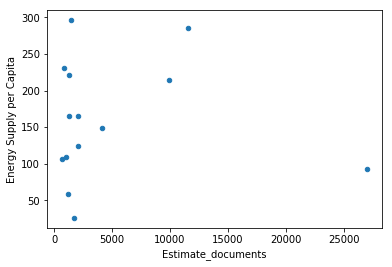

In [83]:
# axis x = 'Energy Supply per Capita' , Citable docs per Capita y = 'Estimate_documents'
df_top15.plot(x ='Estimate_documents', y = 'Energy Supply per Capita' , kind = 'scatter')

# Question 9
+ Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.

+ This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [84]:
d_15 = df_top15.copy()
def ans_nine():
    a = d_15['% Renewable'].median()
    
    #   1 if df_top15['% Renewable'] > a and  else = 0
    d_15['% Renewable'] = [1 if(x >= a)  else 0 for x in d_15['% Renewable']]
    return d_15['% Renewable']
ans_nine()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Australia             0
Brazil                1
Name: % Renewable, dtype: int64

In [ ]:
del d_15

# Question 10 
+ Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

+ ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
+ This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [27]:
ContinentDict = {'China':'Asia',
            'United States':'North America', 
            'Japan':'Asia', 
            'United Kingdom':'Europe', 
            'Russian Federation':'Europe', 
            'Canada':'North America', 
            'Germany':'Europe', 
            'India':'Asia',
            'France':'Europe', 
            'South Korea':'Asia', 
            'Italy':'Europe', 
            'Spain':'Europe', 
            'Australia':'Australia', 
            'Brazil':'South America'}
Continent = pd.Series(ContinentDict).to_frame().reset_index()
Continent.columns = ['Country','Continent']
Continent.head(2)

,Country,Continent
0,China,Asia
1,United States,North America


In [28]:
ContinentDict['India']

'Asia'

In [29]:
# take columns estimate populous , we can compute estimate the estimate energy supply per person
pop = df_top15['Estimate_Energy'].to_frame().reset_index()
pop

,Country,Estimate_Energy
0,China,1.367645e+09
1,United States,3.176154e+08
2,Japan,1.274094e+08
3,United Kingdom,6.387097e+07
4,Russian Federation,1.435000e+08
5,Canada,3.523986e+07
6,Germany,8.036970e+07
7,India,1.276731e+09
8,France,6.383735e+07
9,South Korea,4.980543e+07


In [30]:
continent_df = pd.merge(Continent, pop, on = 'Country', how = 'right')
continent_df = continent_df.set_index('Continent')
continent_df

,Country,Estimate_Energy
Continent,,
Asia,China,1.367645e+09
North America,United States,3.176154e+08
Asia,Japan,1.274094e+08
Europe,United Kingdom,6.387097e+07
Europe,Russian Federation,1.435000e+08
North America,Canada,3.523986e+07
Europe,Germany,8.036970e+07
Asia,India,1.276731e+09
Europe,France,6.383735e+07


In [31]:
# create a new DataFrame  with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] 
# and columns ['size', 'sum', 'mean', 'std']
continent_df1 = continent_df.groupby('Continent')['Estimate_Energy'].agg({'size':np.size, 'sum':np.sum, 
                                                                          'mean':np.mean, 'std':np.std})

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [32]:
continent_df1

,size,sum,mean,std
Continent,,,,
Asia,4.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [33]:
del ContinentDict

In [34]:
# the way 2

In [35]:
ContinentDict = {'China':'Asia',
            'United States':'North America', 
            'Japan':'Asia', 
            'United Kingdom':'Europe', 
            'Russian Federation':'Europe', 
            'Canada':'North America', 
            'Germany':'Europe', 
            'India':'Asia',
            'France':'Europe', 
            'South Korea':'Asia', 
            'Italy':'Europe', 
            'Spain':'Europe', 
            'Australia':'Australia', 
            'Brazil':'South America'}
Con = pd.Series(ContinentDict)
Con[2]

'Asia'

In [36]:
Con['India']

'Asia'

In [37]:
ContinentDict['India']

'Asia'

In [38]:
df_top15 = df_top15.reset_index()
for x in df_top15['Country']:
    print(x)

China
United States
Japan
United Kingdom
Russian Federation
Canada
Germany
India
France
South Korea
Italy
Spain
Australia
Brazil


In [39]:
df_top15['Continent'] = [ContinentDict[x] for x in df_top15['Country']]
df_top15.head(2)

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2011,2012,2013,2014,2015,avgGDP,ratio_Citation,Estimate_Energy,Estimate_documents,Continent
0,China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,26971.702128,Asia
1,United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,11554.512195,North America


In [40]:
df_top15 = df_top15.set_index('Continent')
df_top15.head(2)

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2010,2011,2012,2013,2014,2015,avgGDP,ratio_Citation,Estimate_Energy,Estimate_documents
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,26971.702128
North America,United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,11554.512195


In [41]:
ans = df_top15.groupby('Continent')['Estimate_Energy'].agg({'size':np.size, 'sum':np.sum, 
                                                                          'mean':np.mean, 'std':np.std})
ans

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,size,sum,mean,std
Continent,,,,
Asia,4.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


# Question 11 
+ Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries

In [45]:
# False 

"""def ans_eleven():
    ans = df_top15.groupby('Continent')['Country'].count()
    return ans
ans_eleven()"""

Continent
Asia             4
Australia        1
Europe           6
North America    2
South America    1
Name: Country, dtype: int64

In [53]:
df_15 = df_top15.copy()
df_15 = df_15.reset_index()
# cut : % Renewable into 5 bins
df_15['bins'] = pd.cut(df_15['% Renewable'],5)
df_15.bins

0        (0.8, 1.0]
1     (-0.001, 0.2]
2     (-0.001, 0.2]
3     (-0.001, 0.2]
4        (0.8, 1.0]
5        (0.8, 1.0]
6        (0.8, 1.0]
7     (-0.001, 0.2]
8     (-0.001, 0.2]
9     (-0.001, 0.2]
10       (0.8, 1.0]
11       (0.8, 1.0]
12    (-0.001, 0.2]
13       (0.8, 1.0]
Name: bins, dtype: category
Categories (5, interval[float64]): [(-0.001, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [54]:
# Group Top15 by the Continent, as well as these new % Renewable bins
aans = df_15.groupby(['Continent', 'bins']).size()
aans

Continent      bins         
Asia           (-0.001, 0.2]    3
               (0.8, 1.0]       1
Australia      (-0.001, 0.2]    1
Europe         (-0.001, 0.2]    2
               (0.8, 1.0]       4
North America  (-0.001, 0.2]    1
               (0.8, 1.0]       1
South America  (0.8, 1.0]       1
dtype: int64

# Question 11
+ Convert the Population Estimate series to a string with thousands separator (using commas)

+ e.g. 12345678.90 -> 12,345,678.90

+ This function should return a Series PopEst whose index is the country name and whose values are the population estimate string.



In [42]:
import locale

In [85]:
# convert the Estimate_Energy series to a string with thousands separator(-dấu phân cách) (susing commas(-dấu phẩy))
locale.setlocale(locale.LC_ALL, 'en_US')
# the values of Estimate_Energy is the float values => : %f
df_top15['Estimate_Energy'] = [locale.format("%f", x , grouping= True) for x in df_top15['Estimate_Energy']]
df_top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,avgGDP,ratio_Citation,Estimate_Energy,Estimate_documents
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,"1,367,645,161.290323",26971.702128
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,"317,615,384.615385",11554.512195
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12,0.275997,"127,409,395.973154",4143.228454
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12,0.183773,"63,870,967.741935",2068.800813
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12,0.362517,"143,500,000.000000",9892.432432
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.660647e+12,0.190369,"35,239,864.864865",1467.110741
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12,0.195111,"80,369,696.969697",2037.651332
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12,0.288973,"1,276,730,769.230769",1729.720280
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12,0.218943,"63,837,349.397590",1306.445116


In [86]:
# an example visualization.
df_top15['% Renewable']

Country
China                 19.754910
United States         11.570980
Japan                 10.232820
United Kingdom        10.600470
Russian Federation    17.288680
Canada                61.945430
Germany               17.901530
India                 14.969080
France                17.020280
South Korea            2.279353
Italy                 33.667230
Spain                 37.968590
Australia             11.810810
Brazil                69.648030
Name: % Renewable, dtype: float64

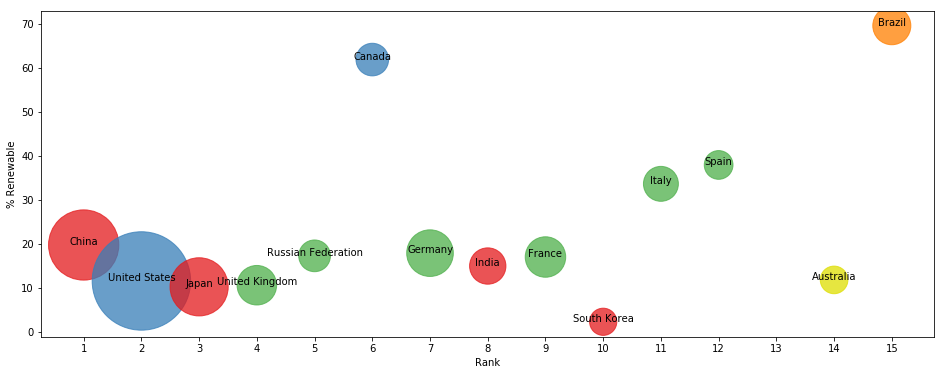

In [92]:
# we use columns 'Rank' and '% Renewable'


ax = df_top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*df_top15['2014']/10**10, alpha=.75, figsize=[16,6]);
# add the name country
for i, txt in enumerate(df_top15.index):
    ax.annotate(txt, [df_top15['Rank'][i], df_top15['% Renewable'][i]], ha='center')
ax

Text(15,69.648,'Brazil')